In [61]:
## Lifelines
import glob
import json

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from scipy.stats import sem
from itertools import groupby
import spacy
import copy
from PIL import Image
import PIL
from matplotlib.pyplot import cm

import warnings

warnings.simplefilter('ignore', np.RankWarning)

nlp = spacy.load("en_core_web_sm")

titles = ['Horror', 'Adventure', 'Drama', 'Biography', 'Action', 'Fantasy', 'SciFi', 'Animation']

In [62]:
fit_degree = 68


def plot_lines(ys, title, wtp_mean, wtp_std, mean=False, word=None):
    if mean:
        ys_mean = np.stack(ys).mean(axis=0)
        ys_sem = sem(np.stack(ys), axis=0)
    else:
        ys_mean = ys

    xs = np.linspace(0, 90, num=900)

    plt.figure()

    n_lines = 15
    color = iter(cm.rainbow(np.linspace(0, 1, n_lines + 2)))
    colors = []

    for i in range(1, n_lines + 2):
        colors.append(next(color))

    for i in range(1, n_lines):
        fit = np.poly1d(np.polyfit(xs, ys_mean, 10 * i))(xs)
        print("max: ", np.max(fit))
        if np.max(fit) > 200:
            print("VALUE TOO HIGH!!!")

        print("min: ", np.min(fit))
        if np.min(fit) > 200:
            print("VALUE TOO LOW!!!")

        plt.plot(xs, fit, color=colors[i - 1],
                 label="Degree {}".format(str(10 * i)))

    plt.plot(xs, ys_mean, color=colors[n_lines], label="Original")

    if mean:
        plt.fill_between(xs, ys_mean - ys_sem, ys_mean + ys_sem, alpha=0.2)

    plt.title("Enjoyment of {} Movie Trailer Over Time\nWTP M={}, SD={}".format(title, str(wtp_mean), str(wtp_std)), )

    if wtp_std is None:
        plt.title("WTP = {}, Word = {}".format(str(wtp_mean), word), fontsize=25)
    else:
        plt.ylabel("Enjoyment")
        plt.xlabel("Time (sec)")

    plt.tight_layout()

    ax = plt.gca()
    ax.set_ylim([0, 100])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.legend()

    if wtp_std is None:
        ax.get_xaxis().set_visible(False)
        plt.savefig("./plots/individual/lifeline_{}.png".format(title), dpi=50)
    else:
        plt.savefig("./plots/analysis_plots/lifeline_{}.png".format(title), dpi=300)

Number of comprehension exclusions:  23
Bigger than 300.. R_bpSmUrechdDZuAF
749
Bigger than 300.. R_bpSmUrechdDZuAF
437
Bigger than 300.. R_bpSmUrechdDZuAF
637
Bigger than 300.. R_bpSmUrechdDZuAF
515
Bigger than 300.. R_bpSmUrechdDZuAF
616
Bigger than 300.. R_bpSmUrechdDZuAF
476
Bigger than 300.. R_bpSmUrechdDZuAF
566
Bigger than 300.. R_bpSmUrechdDZuAF
723
Bigger than 300.. R_Dr8NtXeQ2WcuA7L
341
Bigger than 300.. R_Dr8NtXeQ2WcuA7L
317
Bigger than 300.. R_Dr8NtXeQ2WcuA7L
309
Bigger than 300.. R_qCtAFnNVzy3tj3P
446
Bigger than 300.. R_qCtAFnNVzy3tj3P
439
Bigger than 300.. R_1BXJjlHfdJhzN2W
332
Bigger than 300.. R_1BXJjlHfdJhzN2W
321
Bigger than 300.. R_1NlgJRLnrPZ3IDX
682
Bigger than 300.. R_1NlgJRLnrPZ3IDX
900
Bigger than 300.. R_1NlgJRLnrPZ3IDX
589
Bigger than 300.. R_1NlgJRLnrPZ3IDX
449
Bigger than 300.. R_1NlgJRLnrPZ3IDX
365
Bigger than 300.. R_1NlgJRLnrPZ3IDX
654
Bigger than 300.. R_1NlgJRLnrPZ3IDX
492
Bigger than 300.. R_2fxopL2E7wN6bV0
428
Bigger than 300.. R_246Oj0XNUz3WZno
306


/Users/kaan/opt/anaconda3/envs/chatbot_stigma/lib/python3.8/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/kaan/opt/anaconda3/envs/chatbot_stigma/lib/python3.8/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


max:  63.780320951523436
min:  48.138650494467335
max:  62.79528101421832
min:  49.27059103947294
max:  63.20939532571059
min:  49.40671776136263
max:  63.1065375061665
min:  49.60308595835727
max:  63.27968492821782
min:  49.425163237919406
max:  63.3082160002058
min:  49.44533404233207
max:  63.267767016077585
min:  49.44426035454099
max:  63.32348766518844
min:  49.54185507060663
max:  63.32349226976763
min:  49.54184996208299
max:  63.323487998187915
min:  49.541838736690366
max:  63.323492507493015
min:  49.54184387094074
max:  63.323496437233466
min:  49.54184536955537
max:  63.323510684401626
min:  49.54183907086653
max:  63.32350133983873
min:  49.54183775980515
max:  54.65658333062624
min:  44.3639012752608
max:  55.07672637531322
min:  44.38105703434876
max:  55.24010041206695
min:  44.208217450288195
max:  55.14639168597441
min:  44.27369477979693
max:  55.15333567537112
min:  44.26328659043051
max:  55.49529775491384
min:  44.25427644139382
max:  55.17642049599178
min:  44.

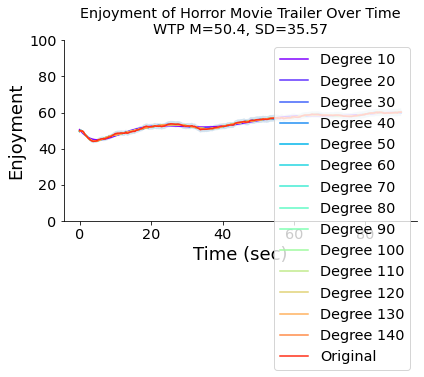

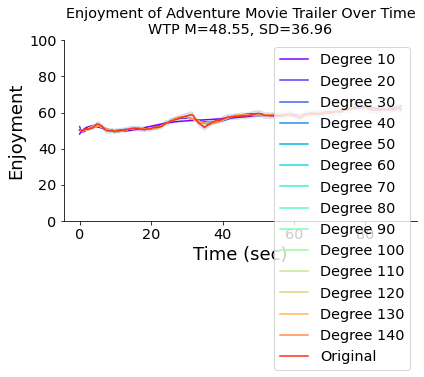

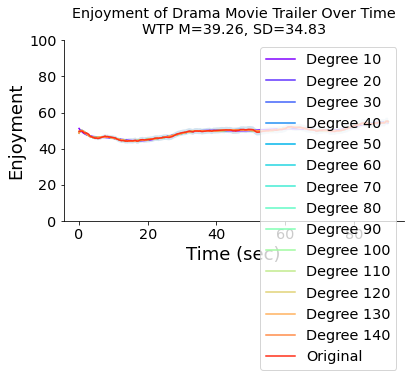

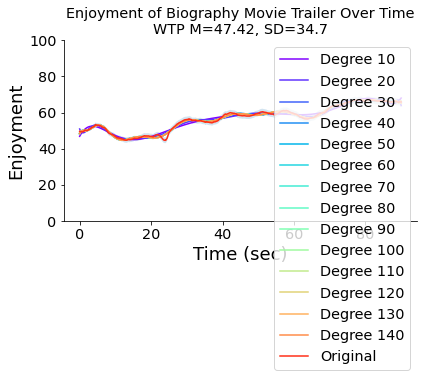

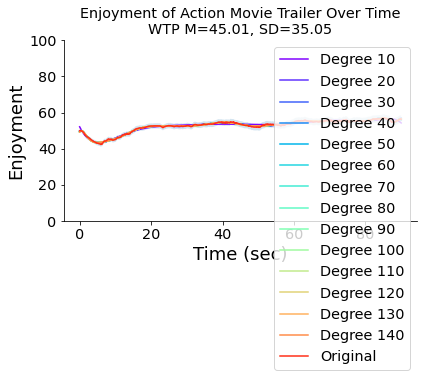

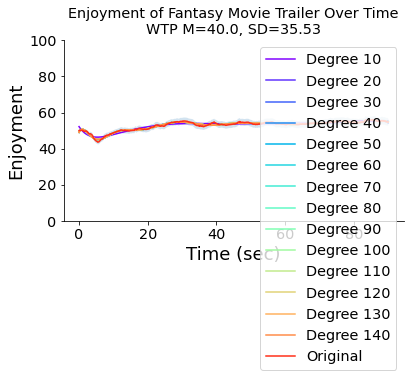

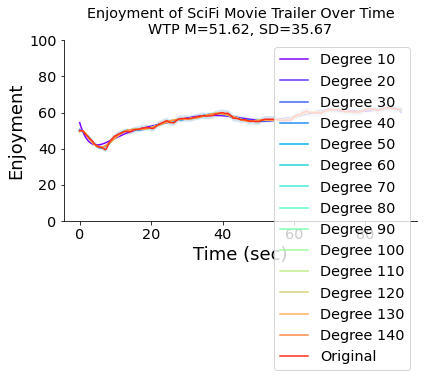

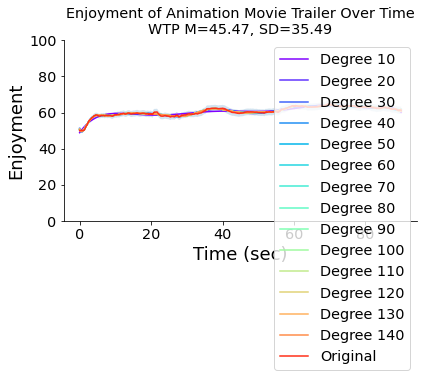

In [63]:
from rpy2 import robjects
from rpy2.robjects.packages import importr

base = importr('base')
stats = importr('stats')

from rpy2.robjects import pandas2ri

pandas2ri.activate()

data = pd.read_csv('./data/data_prolific.csv')
data = data.drop(data[data.Finished != 'True'].index)

## All passed at least one of the two attention and comprehension checks
## Drop low connections

lengths = []


def listify(row):
    row = str(row).split(',')
    row = [float(y) for y in row]

    return row


for title in titles:
    data.loc[:, '{}Enjoyment'.format(title)] = data.loc[:, '{}Enjoyment'.format(title)].apply(listify, args=())
    estr = '4' if title not in ['Action', 'Adventure'] else '1'

######################## PERFORM EXCLUSIONS ########################
# All passed attention checks
# Comprehension checks
total = data.shape[0]
data = data[(data['comp_check_1'] == 'Shazam! Fury of the Gods') & (data['comp_check_2'] == 'Enjoyment')]
print("Number of comprehension exclusions: ", total - data.shape[0])

## Remove data with too few or many points, and exclude those who have the same enjoyments for more than 30 seconds
rms = []
for index, row in data.iterrows():
    for title in titles:
        if abs(len(row['{}Enjoyment'.format(title)]) - 900) > 300:
            print("Low data qual {}".format(row['ResponseId']))
            print(len(row['{}Enjoyment'.format(title)]))
            rms.append(row['ResponseId'])

        if max([sum(1 for i in g) for k, g in groupby(row['{}Enjoyment'.format(title)])]) > 300:
            print("Bigger than 300.. {}".format(row['ResponseId']))
            print(max([sum(1 for i in g) for k, g in groupby(row['{}Enjoyment'.format(title)])]))
            rms.append(row['ResponseId'])

        # Get the duration of which resolution the participant watched the video in
        state_changes = json.loads(row['{}StateChanges'.format(title)])
        playback_qualities = json.loads(row['{}PlaybackQualities'.format(title)])

        data.loc[index, '{}PlaybackQuality'.format(title)] = playback_qualities[0][0]
        data.loc[index, '{}StateChangeAmount'.format(title)] = len(state_changes)
        data.loc[index, '{}QualityChangeAmount'.format(title)] = len(playback_qualities)

rms = list(dict.fromkeys(rms))
data = data[~data['ResponseId'].isin(rms)]
print(rms)
print("Exclusions from inactivity: ", len(rms))


def resample_time(row):
    return signal.resample(row, 900)


##  Resample the data to be 900 ms, and plot the graphs
for title in titles:
    data.loc[:, '{}Enjoyment'.format(title)] = data.loc[:, '{}Enjoyment'.format(title)].apply(resample_time)
    estr = '4' if title not in ['Action', 'Adventure'] else '1'
    plot_lines(data.loc[:, '{}Enjoyment'.format(title)], title='{}'.format(title),
               wtp_mean=round(data['{}_willing_{}'.format(title.lower(), estr)].astype(int).mean(), 2),
               wtp_std=round(data['{}_willing_{}'.format(title.lower(), estr)].astype(int).std(), 2), mean=True)


In [64]:


# Linear regression to see whether different playback qualities and state changes affect WTP
for title in titles:
    print(title, "State Change Amount")

    estr = '4' if title not in ['Action', 'Adventure'] else '1'
    robjects.globalenv['dataframe'] = data[
        ['{}_willing_{}'.format(title.lower(), estr), '{}StateChangeAmount'.format(title),
         '{}PlaybackQuality'.format(title), '{}QualityChangeAmount'.format(title)]]
    M = stats.lm(
        '{}_willing_{} ~ {}StateChangeAmount + {}QualityChangeAmount + {}PlaybackQuality'.format(title.lower(), estr,
                                                                                                 title, title, title),
        data=base.as_symbol('dataframe'))
    print(base.summary(M))

    # Clean dataframe since we do not need these columns now
    data = data.drop(columns=['{}StateChangeAmount'.format(title), '{}QualityChangeAmount'.format(title),
                              '{}PlaybackQuality'.format(title)])



Horror State Change Amount

Call:
(function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!is.null(w) && !is.numeric(w)) 
        stop("'weights' must be a numeric vector")
    offset <- model.offset(mf)
    mlm <- is.matrix(y)
    ny <- if

In [66]:
import copy
from scipy.stats import sem

# Calculate metrics for predicting enjoyments...

xs = np.linspace(0, 90, num=900)


# Number of Peaks
def get_num_peaks(row):
    poly = np.polyfit(xs, row, fit_degree)
    poly_y = np.poly1d(poly)(xs)

    peaks, _ = signal.find_peaks(poly_y)

    #plot_lines(row, "asd", 0, 0)
    return len(peaks)


# Number of Valleys
def get_num_valleys(row):
    poly = np.polyfit(xs, row, fit_degree)
    poly_y = np.poly1d(poly)(xs)

    # Find peaks of negative signal ---
    peaks, _ = signal.find_peaks(-poly_y)

    #plot_lines(row, "asd", 0, 0)
    return len(peaks)


# Number of Extrema
def get_num_extrema(row):
    return get_num_peaks(row) + get_num_valleys(row)


def get_first_derivative(row):
    poly = np.polyfit(xs, row, fit_degree)
    return json.dumps(list(np.polyder(poly)))


def get_poly(row):
    #plot_lines(row, "testing_{}".format(np.mean(row)), 10, 0)
    return json.dumps(list(np.polyfit(xs, row, fit_degree)))


def get_best_degree(row, errors):
    for degree in range(1, 150):
        if errors.get(degree, None) is None:
            errors[degree] = []

        #plot_lines(row, "testing_{}".format(np.mean(row)), 10, 0)
        fit = np.polyfit(xs, row, degree)
        yfit = np.polyval(fit, xs)
        residual = np.sum((row - yfit) ** 2)
        errors[degree].append(residual)
        #errors[degree].append(np.sum(fit[1]))



errors = {}
## Save the polynomials for R
for title in titles:
    print(title)
    data.loc[:, '{}Enjoyment'.format(title)].apply(get_best_degree, errors=errors)
    data[title + '_first_derivative'] = data.loc[:, '{}Enjoyment'.format(title)].apply(get_first_derivative)
    data[title + '_equation'] = data.loc[:, '{}Enjoyment'.format(title)].apply(get_poly)
    data[title + '_number_peaks'] = data.loc[:, '{}Enjoyment'.format(title)].apply(get_num_peaks)
    data[title + '_number_valleys'] = data.loc[:, '{}Enjoyment'.format(title)].apply(get_num_valleys)
    data[title + '_number_extrema'] = data.loc[:, '{}Enjoyment'.format(title)].apply(get_num_extrema)

data.to_csv('./data/lifelines_cleaned_deg{}.csv'.format(fit_degree))

Horror
Adventure
Drama
Biography
Action
Fantasy
SciFi
Animation


In [70]:
err_mean = []
err_sem = []
for degree, errs in errors.items():
    print("Error for degree {} is: ".format(degree), sum(errs) / len(errs))
    err_mean.append(sum(errs) / len(errs))
    err_sem.append(sem(errs))

Error for degree 1 is:  112310.23405695624
Error for degree 2 is:  87378.40320263614
Error for degree 3 is:  70535.45948436049
Error for degree 4 is:  59566.5838615679
Error for degree 5 is:  50950.1233528593
Error for degree 6 is:  44541.69470010114
Error for degree 7 is:  39814.04755406604
Error for degree 8 is:  36105.45122968385
Error for degree 9 is:  32313.419461165184
Error for degree 10 is:  29547.690515653845
Error for degree 11 is:  26675.76984750902
Error for degree 12 is:  24696.695556686966
Error for degree 13 is:  22911.476285515822
Error for degree 14 is:  21361.211003890392
Error for degree 15 is:  19912.59333300866
Error for degree 16 is:  18569.84484850469
Error for degree 17 is:  17431.860418820135
Error for degree 18 is:  17411.035484839515
Error for degree 19 is:  16410.780226710365
Error for degree 20 is:  16456.32348164577
Error for degree 21 is:  16486.377807816607
Error for degree 22 is:  15454.315966265109
Error for degree 23 is:  15493.394558207381
Error for 

In [71]:
min(err_mean)

11935.647829250538

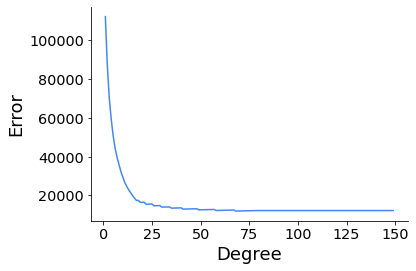

In [74]:

def plot_error_line(err_mean, err_sem):
    SMALL_SIZE = 16 * 9/10
    MEDIUM_SIZE = 20 * 9/10
    BIGGER_SIZE = 24 * 9/10

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE + 1)  # fontsize of the figure title


    xs = np.linspace(1, 149, num=149)
    plt.figure()

    plt.plot(xs, err_mean, color="#4287f5")
    #plt.fill_between(xs, list(np.array(err_mean) - np.array(err_sem)), list(np.array(err_mean) + np.array(err_sem)), alpha=0.2, color="#4287f5")

#    plt.title("Sum of Squares of the Fit Errors")


    plt.ylabel("Error")
    plt.xlabel("Degree")

    plt.tight_layout()


    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.savefig("./plots/err.png", dpi=1000)

plot_error_line(err_mean, err_sem)

In [72]:
################## FLATTEN THE DATA ##################
########### Run after running "calculate_predictors.R ###########
#    Input: dataframe with number of rows = n_subjects
#    Output: dataframe with number of rows = n_subjects * n_genres (=8)
data = pd.read_csv('./data/lifelines_w_features.csv')
include_points = True

df = None
count = 1


def flatten_data(data, count, df, include_points=False):
    # Split the columns, based on name
    for title in titles:
        a = data.filter(regex=(title))
        b = data.filter(regex=(title.lower()))

        acols = [c for c in a.columns][4:]
        bcols = [c for c in b.columns][5:]

        a = a[acols]
        b = b[bcols]

        X = pd.concat([a, b], axis=1)

        old_colnames = list(X.columns)
        new_colnames = {}

        if include_points:
            def listify(row):
                row = str(row).replace('[', '').replace(']', '').replace('\n', '').split(' ')
                row = [float(y) for y in row if y != '']

                return row

            X['points'] = data['{}Enjoyment'.format(title)]
            X.loc[:, 'points'] = X.loc[:, 'points'].apply(listify)

        for old in old_colnames:
            new_colnames[old] = old.lower().split(title.lower() + "_")[1]

            if 'willing' in new_colnames[old]:
                new_colnames[old] = new_colnames[old][:-2]

        X = X.rename(columns=new_colnames)
        X['genre'] = title

        X['subject'] = [c for c in range(1, data.shape[0] + 1)]
        X['movie_choice'] = data['movie_choice']
        count += 1

        if df is None:
            df = copy.deepcopy(X)
        else:
            df = pd.concat([df, X], axis=0)

    return df


df = flatten_data(data, count, df, include_points)
df = df.sort_values(by=['subject', 'genre'])


def get_token(row):
    return [token.pos_ for token in nlp(row)][0]


def get_tokens_sentences(row):
    return [token.pos_ for token in nlp(row)]


df.loc[:, 'word_tag'] = df.loc[:, 'word'].apply(get_token)

if include_points:
    df.to_csv('./data/data_long.csv')
else:
    df.to_csv('./data/data.csv')

In [ ]:
################## PLOTTING ALL PARTICIPANTS ##################

# Plot each participant separately

plots = {}

for title in titles:
    count = 1
    for index, row in data.iterrows():
        plot_lines(row['{}Enjoyment'.format(title)], str(count) + "_{}".format(title),
                   wtp_mean=row.filter(regex='{}_willing'.format(title).lower())[0], wtp_std=None,
                   word=row.filter(regex='{}_word'.format(title).lower())[0])
        count += 1


In [ ]:
# Concatenate vertically
def get_concat_v(im1, im2):
    if im2 is None:
        return im1
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst


# Concatenate horizontally
def get_concat_h(im1, im2):
    if im2 is None:
        return im1
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


# Concatanate all participant plots into one huge plot
himg2 = None
for title in titles:
    im2 = None
    for i in range(1, 234):
        img_file = glob.glob('./plots/individual/lifeline_{}_{}.png'.format(i, title))[0]
        print(img_file)
        im2 = get_concat_v(Image.open(img_file), im2)

    im2.save("{}_combined.jpg".format(title))
    himg2 = get_concat_h(im2, himg2)

himg2.save("all_combined.jpg".format(title))
